In [191]:
from zomathon import ZomatoAPI

import pyzomato
import requests  
import config

In [192]:
api_key = '9cf7ac349ab1761b141a146797705a38'


In [193]:
# Program to list out 20 random restaurants of a given location. It uses Zomato Api to return the results.

In [202]:
def get_location_details(query):

    headers = {
        'Accept': 'application/json',
        'user-key': api_key,
    }
    params = (
        ('query', query),
    )

    response = requests.get('https://developers.zomato.com/api/v2.1/locations', headers=headers, params=params)
    data = response.json()

    for loc in data['location_suggestions']:
        loc_id = loc['entity_id']
        loc_type = loc['entity_type']
        title = loc['title']
    return loc_id, loc_type , title


def get_restaurants(ent_id, ent_type, title):

    headers = {
        'Accept': 'application/json',
        'user-key': api_key,
    }

    params = (
        ('entity_id', ent_id),
        ('entity_type', ent_type),
        ( 'title' , title )
    )

    response = requests.get('https://developers.zomato.com/api/v2.1/search', headers=headers, params=params)

    return response.json()


if __name__ == '__main__':

    prompt = '> '
    print('Enter location to search')
    q = input(prompt)
    print()

    entity_id, entity_type, title = get_location_details(q)
    data = get_restaurants(entity_id, entity_type, title)

    print("Restaurants in " + q.title() + " --\n")

    for restaurant in data['restaurants']:
        r = restaurant['restaurant']
        print(r['name'].upper())
        
        loct = r['location']
        print(loct['locality'])
        
        rating = r['user_rating']
        print("Rating - " + str(rating['aggregate_rating']))
       
        rating_text = r['user_rating']
        print("Review - "+rating_text['rating_text'])
        
        
        
        add = r['location']
        print(add['address'])
        
        mod_res = restaurent.append(pd.Series([r['name'].upper(), loct['locality'], rating_text['rating_text']], index=restaurent.columns ), ignore_index=True)



        print()

Enter location to search
> Hyderabad

Restaurants in Hyderabad --

36 DOWNTOWN BREW PUB
Jubilee Hills
Rating - 4.4
Review - Very Good
Plot 753, Road 36, Jubilee Hills, Hyderabad

BEYOND FLAVOURS
Gachibowli
Rating - 4.2
Review - Very Good
1st Floor, Fantasy Square, Opposite Bio Diversity Park, Gachibowli, Hyderabad

AURA CAFE
Jubilee Hills
Rating - 4.6
Review - Excellent
Plot 280-A, Road 10C, Jubilee Hills, Hyderabad

ONESTA
Banjara Hills
Rating - 4.7
Review - Excellent
303, 3rd Floor, ANR Centre,.137, Road Number.1, Banjara Hills, Hyderabad

SHAH GHOUSE HOTEL & RESTAURANT
Gachibowli
Rating - 4.2
Review - Very Good
8-191/15, Opposite Bio Diversity Park, Raidurgam, Gachibowli Main Road, Gachibowli, Hyderabad

BAWARCHI
Nallakunta
Rating - 4.5
Review - Excellent
Plot 44, RTC Cross Road, Opposite Sandhya Theatre, Chikkadpally, Nallakunta, Hyderabad

CAPTAIN COOK
Musheerabad
Rating - 4.0
Review - Very Good
1-7-153/2, Beside SR Convention, Musheerabad, Hyderabad

AB'S - ABSOLUTE BARBECUES
Jub

In [106]:
restaurent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
name           0 non-null object
location       0 non-null object
rating_text    0 non-null object
dtypes: object(3)
memory usage: 0.0+ bytes


In [179]:
data

{'results_found': 13,
 'results_start': 0,
 'results_shown': 13,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 16685197},
    'apikey': '9cf7ac349ab1761b141a146797705a38',
    'id': '16685197',
    'name': 'Pivaz - Epping',
    'url': 'https://www.zomato.com/east-of-england/pivaz-epping-epping?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '238-240 Epping High Street, Epping, East of England CM16 4',
     'locality': 'Epping',
     'city': 'East of England',
     'city_id': 322,
     'latitude': '51.7007410000',
     'longitude': '0.1140820000',
     'zipcode': 'CM16 4',
     'country_id': 215,
     'locality_verbose': 'Epping, East of England'},
    'switch_to_order_menu': 0,
    'cuisines': 'American, Burger, Italian',
    'timings': '12 Noon to 11 PM',
    'average_cost_for_two': 12,
    'price_range': 2,
    'currency': '£',
    'highlights': ['Dinner', 'Lunch', 'Indoor Seat

In [195]:
import pandas as pd
import matplotlib.pyplot as plt


In [196]:
zomato = pd.read_csv('zomato.csv',engine='python')

In [197]:
zomato.shape

(9551, 21)

In [122]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [198]:
zomato['Restaurant Name'].value_counts()

Cafe Coffee Day                                 83
Domino's Pizza                                  79
Subway                                          63
Green Chick Chop                                51
McDonald's                                      48
Keventers                                       34
Pizza Hut                                       30
Giani                                           29
Baskin Robbins                                  28
Barbeque Nation                                 26
Dunkin' Donuts                                  22
Barista                                         22
Giani's                                         22
Costa Coffee                                    20
Pind Balluchi                                   20
Sagar Ratna                                     19
Twenty Four Seven                               19
Wah Ji Wah                                      19
Pizza Hut Delivery                              19
Starbucks                      

In [199]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [163]:
zomato['City'].value_counts()

New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
Ahmedabad            21
Bhubaneshwar         21
Guwahati             21
Amritsar             21
Lucknow              21
Mumbai               20
Doha                 20
Albany               20
Allahabad            20
Colombo              20
S��o Paulo           20
Singapore            20
Kanpur               20
Dalton               20
Pensacola            20
Goa                  20
Agra                 20
Vizag                20
Dubuque              20
Varanasi             20
Abu Dhabi            20
Jaipur               20
Bhopal               20
Rest of Hawaii       20
Des Moines           20
                   ... 
Middleton Beach       1
Ojo Caliente          1
Randburg              1
Balingup              1
Mayfield              1
Fernley               1
Palm Cove             1
Beechworth            1
East Ballina          1
Vernonia              1
Armidale        

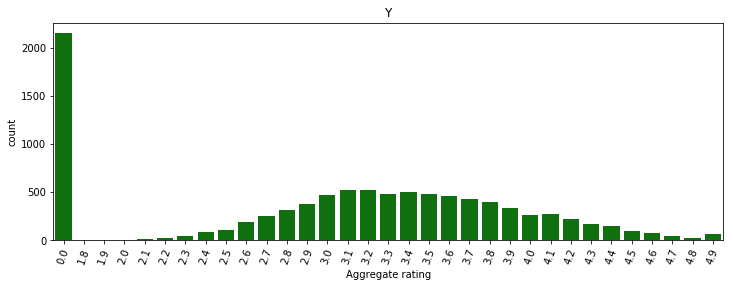

In [135]:
import seaborn as sns
rating = ['Aggregate rating', 'rating_cat']

f, ax = plt.subplots(1,1, figsize = (12, 4))
sns.countplot(zomato['Aggregate rating'], ax = ax, color = 'green')
ax.tick_params('x', rotation = 70)
ax.set_title('Y')
plt.show()

In [136]:
# This looks like a Normal Distribution

In [140]:
!pip install squarify

In [200]:
import folium
import squarify
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [201]:
tr_USA = zomato.loc[zomato['Country Code'] == 216,['Latitude', 'Longitude']]
map_F = folium.Map(location = [35, -92], zoom_start = 4)
for i, (lat, lon) in enumerate(tr_USA.values): folium.Marker([lat, lon]).add_to(map_F)
map_F


In [175]:
zomato['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [173]:
zomato1 = zomato[zomato['Country Code'] == 434]

In [190]:
tr_singapore = zomato.loc[zomato['Country Code'] == 184,['Latitude', 'Longitude']]
map_F = folium.Map(location = [1.3, 104], zoom_start = 4)
for i, (lat, lon) in enumerate(tr_USA.values): folium.Marker([lat, lon]).add_to(map_F)
map_F